    Age : Age of the patient
    Sex : Sex of the patient (male = 0, female = 1)
    exang: exercise induced angina (1 = yes; 0 = no)
    ca: number of major vessels (0-3)
    cp : Chest Pain type chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic
    trtbps : resting blood pressure (in mm Hg)
    chol : cholestoral in mg/dl fetched via BMI sensor
    fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    rest_ecg : resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    thalach : maximum heart rate achieved
    oldpeak: Previous peak
    slp: Slope
    thall: Thalium Stress Test result ~ (0,3)
    output : 0= less chance of heart attack 1= more chance of heart attack


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Категориальные:  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']

Интервальные :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


In [ ]:
print('Кол-во строк',df.shape[0], 'кол-во столбцов ',df.shape[1])

Кол-во строк 303 кол-во столбцов  14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df[df.duplicated()]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
df.drop_duplicates(keep='first',inplace=True)


Мин, медиана, среднее, макс значения и персентили 10, 25, 75, 90 для интервальных переменных



In [ ]:
df[['age', 'trtbps','chol','thalachh','oldpeak']].describe()

,age,trtbps,chol,thalachh,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


В целом у параметров средние значения и значения квартиля 50% (моды) незначительно отличаются, что может свидетельствовать о симметричности распределения данных.

Параметр chol, thalachh имеют наибольший разброс в данных.

In [ ]:
print("Квантиль 0.1"'\n', df[['age', 'trtbps','chol','thalachh','oldpeak']].quantile(q=0.1))
print("Квантиль 0.9"'\n',df[['age', 'trtbps','chol','thalachh','oldpeak']].quantile(q=0.9))

Квантиль 0.1
 age          42.0
trtbps      110.0
chol        188.4
thalachh    116.0
oldpeak       0.0
Name: 0.1, dtype: float64
Квантиль 0.9
 age          66.0
trtbps      152.0
chol        308.9
thalachh    176.8
oldpeak       2.8
Name: 0.9, dtype: float64


Мода, сколько раз мода встречается в данных, уникальные значения,
наиболее повторяемое значение для каждой категориальной переменной

In [ ]:
df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']].nunique()

age          41
trtbps       49
chol        152
thalachh     91
oldpeak      40
dtype: int64

In [ ]:
df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']].mode()

,age,trtbps,chol,thalachh,oldpeak
0,58.0,120.0,197,162.0,0.0
1,NaN,NaN,204,NaN,NaN
2,NaN,NaN,234,NaN,NaN


In [ ]:
corr_matrix = df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']].corr()
corr_matrix

,age,trtbps,chol,thalachh,oldpeak,output
age,1.000000,0.283121,0.207216,-0.395235,0.206040,-0.221476
trtbps,0.283121,1.000000,0.125256,-0.048023,0.194600,-0.146269
chol,0.207216,0.125256,1.000000,-0.005308,0.050086,-0.081437
thalachh,-0.395235,-0.048023,-0.005308,1.000000,-0.342201,0.419955
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000,-0.429146
output,-0.221476,-0.146269,-0.081437,0.419955,-0.429146,1.000000


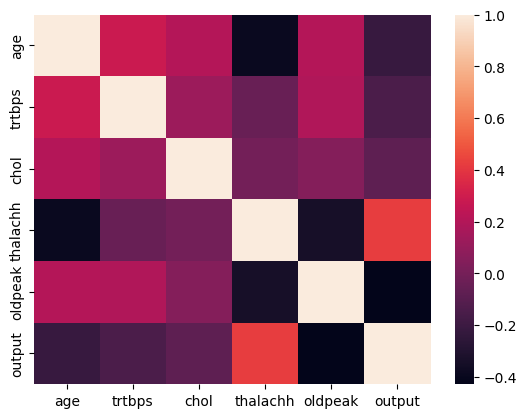

In [ ]:
sns.heatmap(corr_matrix);

Согласно тепловой карте нет явной линейной корреляции между непрерывными переменными.

При этом на риск возникновения сердечного приступа наибольшее влияние оказывают величины ЧСС и

Н0: нет зависимости между ЧСС и риском возникновения сердечного приступа

Н1: существует зависимость между ЧСС и риском возникновения сердечного приступа

In [ ]:
from scipy.stats import mannwhitneyu
no_heart_attack = list(df[df['output'] == 0]['thalachh'])
heart_attack = list(df[df['output'] == 1]['thalachh'])
stat, p = mannwhitneyu(no_heart_attack, heart_attack)
print('stat=%.3f, p=%.20f' % (stat, p))

stat=5725.000, p=0.00000000000013977197


p-value < 0.05 => существует статистически значимая связь между уровнем ЧСС и риском возникновения сердечного приступа. Можно сказать, что уровень ЧСС влияет на риск возникновения сердечного приступа

<Axes: xlabel='output', ylabel='oldpeak'>

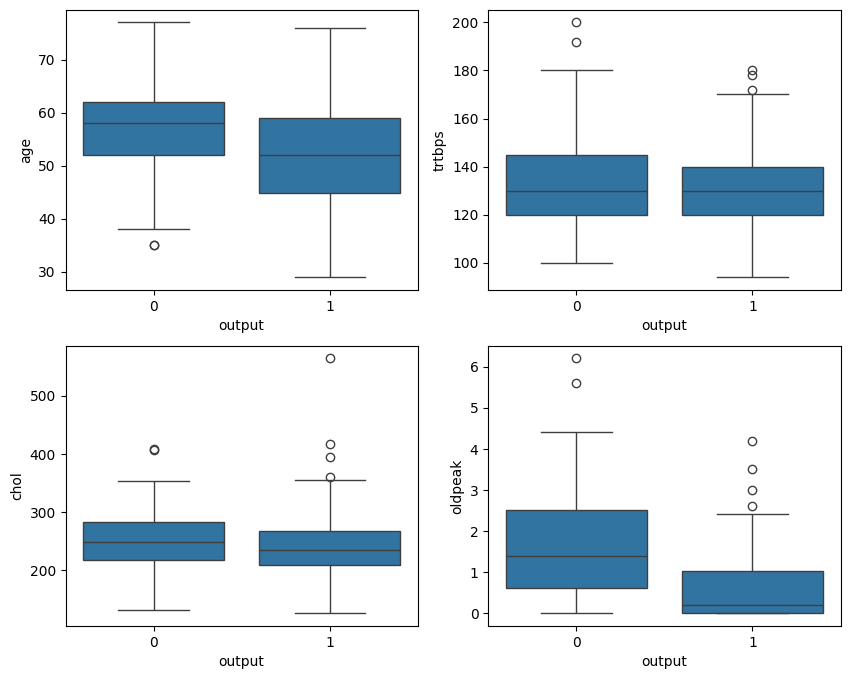

In [ ]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(10, 8))
sns.boxplot(x = 'output', y = 'age', data = df, ax=ax0)
sns.boxplot(x = 'output', y = 'trtbps', data = df, ax=ax1)
sns.boxplot(x = 'output', y = 'chol', data = df, ax=ax2)
sns.boxplot(x = 'output', y = 'oldpeak', data = df, ax=ax3)

Параметры chol и trtbps не сильно отличаются у людей с высоким риском возникновения сердечного приступа от людей с низким уровнем.

По графику можно сказать, что люди с более низким риском возникновения сердечного приступа имеют в среднем более высокий возраст, чем люди с более высоким риском


H0: Нет зависимости между уровнем холестирина и риском возникновения сердечного приступа

H1: Есть зависимость между уровнем холестеринаи и риском возникновения сердечного приступа

In [ ]:
no_heart_attack = list(df[df['output'] == 0]['chol'])
heart_attack = list(df[df['output'] == 1]['chol'])
stat, p = mannwhitneyu(no_heart_attack, heart_attack)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=12850.500, p=0.042


P-value < 0.05. следовательно,  при уровне значимости 0,05, существует зависимость между уровнем холестирина в крови и риском возникновения сердечного приступа



H0: Нет зависимости между уровнем артериального давления крови и риском возникновения сердечного приступа

H1: Есть зависимость между уровнем артериального давления крови и риском возникновения сердечного приступа


In [ ]:
no_heart_attack = list(df[df['output'] == 0]['trtbps'])
heart_attack = list(df[df['output'] == 1]['trtbps'])
stat, p = mannwhitneyu(no_heart_attack, heart_attack)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=12931.000, p=0.032


P-value < 0.05. При уровне значимости 0,05, существует зависимость между уровнем арткриального давления крови и риском возникновения сердечного приступа

<Axes: xlabel='output', ylabel='count'>

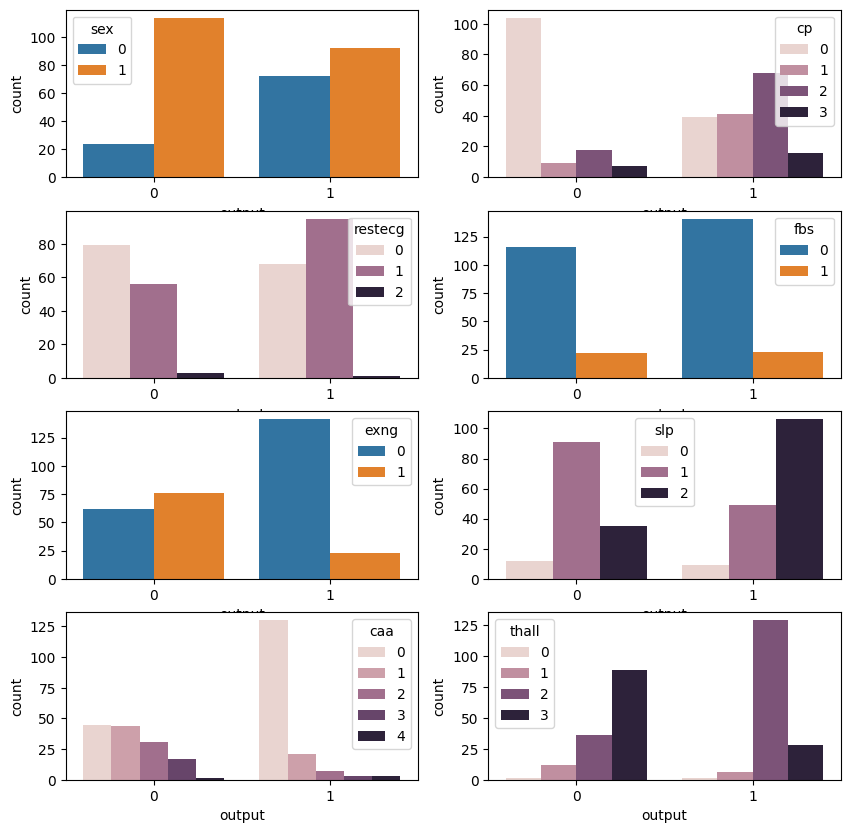

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
sns.countplot(x="output", hue="sex", data=df, ax=axes[0][0])
sns.countplot(x="output", hue="cp", data=df, ax=axes[0][1])
sns.countplot(x="output", hue="restecg", data=df, ax=axes[1][0])
sns.countplot(x="output", hue="fbs", data=df, ax=axes[1][1])
sns.countplot(x="output", hue="exng", data=df, ax=axes[2][0])
sns.countplot(x="output", hue="slp", data=df, ax=axes[2][1])
sns.countplot(x="output", hue="caa", data=df, ax=axes[3][0])
sns.countplot(x="output", hue="thall", data=df, ax=axes[3][1])


Наиболее более высокий риск сердечного приступа у людей с:
                  
* Chest Pain тип Value 3: non-anginal pain
* rest_ecg : Value 1: having ST-T wave abnormality
* exng = 0
* slp = 2
* caa = 0
* thall = 2


  



Наиболее часто риск возникновения сердечного приступа возникает у людей среднего возраста (40 - 60 лет)

можно разделить данные на группы по trtbps, chol, tchalachh, oldpeak

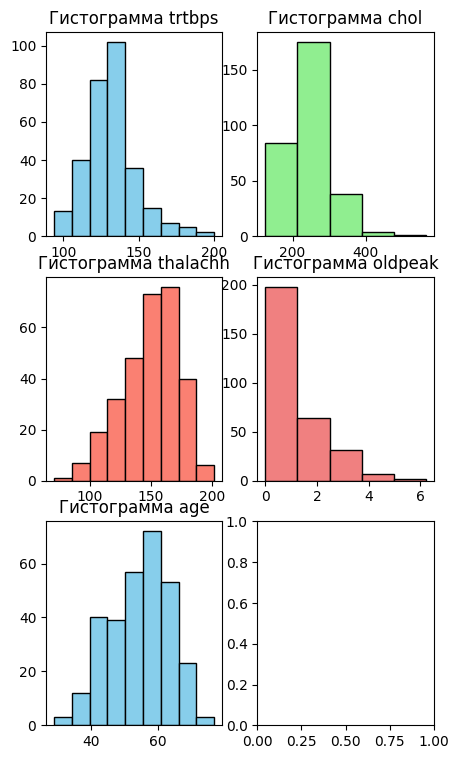

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(5, 9))
axs[0, 0].hist(df['trtbps'], bins=9, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Гистограмма trtbps')
axs[0, 1].hist(df['chol'], bins=5, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Гистограмма chol')
axs[1, 0].hist(df['thalachh'], bins=9, color='salmon', edgecolor='black')
axs[1, 0].set_title('Гистограмма thalachh')
axs[1, 1].hist(df['oldpeak'], bins=5, color='lightcoral', edgecolor='black')
axs[1, 1].set_title('Гистограмма oldpeak')
axs[2, 0].hist(df['age'], bins=9, color='skyblue', edgecolor='black')
axs[2, 0].set_title('Гистограмма age')


plt.show()

Разделим

trtbps на 6 групп

chol на 4 группы

thalachh на 6 групп

oldpeak на 4 группы

age на 4 группы

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
import pandas as pd
# df = df.dpop(columns = ['sex', 'fbs', 'exng', 'slp'])
# df = df.drop('sex', axis=1)
# df = df.drop('fbs', axis=1)
# df = df.drop('exng', axis=1)
# df = df.drop('slp', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('output', axis=1)
y = df['output']

# Разделяем данные на тренировочный и тестовый датасеты
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# x_train['age_bin'] = pd.cut(x_train['age'], bins=4, labels=['age_1', 'age_2', 'age_3', 'age_4'])
# x_train['trtbps_bin'] = pd.cut(x_train['trtbps'], bins=6, labels=['trtbps_1', 'trtbps_2', 'trtbps_3', 'trtbps_4','trtbps_5', 'trtbps_6'])
# # x_train['trtbps_bin'] = pd.cut(x_train['trtbps'], bins=9, labels=['trtbps_1', 'trtbps_2', 'trtbps_3', 'trtbps_4','trtbps_5', 'trtbps_6','trtbps_7', 'trtbps_8', 'trtbps_9'])
# x_train['chol_bin'] = pd.cut(x_train['chol'], bins=4, labels=['chol_1', 'chol_2', 'chol_3', 'chol_4'])
# x_train['thalachh_bin'] = pd.cut(x_train['thalachh'], bins=6, labels=['thalachh_1', 'thalachh_2', 'thalachh_3', 'thalachh_4','thalachh_5', 'thalachh_6'])
# x_train['oldpeak_bin'] = pd.cut(x_train['oldpeak'], bins=4, labels=['oldpeak_1', 'oldpeak_2', 'oldpeak_3', 'oldpeak_4'])

# # Применение get_dummies к бинам
# # x_train = pd.get_dummies(x_train[['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall', 'age_bin', 'trtbps_bin', 'chol_bin', 'thalachh_bin', 'oldpeak_bin']])
# # x_train = pd.get_dummies(x_train[['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall', 'age_bin', 'trtbps_bin', 'thalachh_bin']])
# x_train = pd.get_dummies(x_train[['caa', 'cp', 'restecg', 'thall', 'age_bin', 'trtbps_bin', 'chol_bin', 'thalachh_bin', 'oldpeak_bin']])
# x_train.head()

In [ ]:
# x_test['age_bin'] = pd.cut(x_test['age'], bins=4, labels=['age_1', 'age_2', 'age_3', 'age_4'])
# x_test['trtbps_bin'] = pd.cut(x_test['trtbps'], bins=6, labels=['trtbps_1', 'trtbps_2', 'trtbps_3', 'trtbps_4','trtbps_5', 'trtbps_6'])
# # x_test['trtbps_bin'] = pd.cut(x_test['trtbps'], bins=9, labels=['trtbps_1', 'trtbps_2', 'trtbps_3', 'trtbps_4','trtbps_5', 'trtbps_6','trtbps_7', 'trtbps_8', 'trtbps_9'])
# x_test['chol_bin'] = pd.cut(x_test['chol'], bins=4, labels=['chol_1', 'chol_2', 'chol_3', 'chol_4'])
# x_test['thalachh_bin'] = pd.cut(x_test['thalachh'], bins=6, labels=['thalachh_1', 'thalachh_2', 'thalachh_3', 'thalachh_4','thalachh_5', 'thalachh_6'])
# x_test['oldpeak_bin'] = pd.cut(x_test['oldpeak'], bins=4, labels=['oldpeak_1', 'oldpeak_2', 'oldpeak_3', 'oldpeak_4'])

# # Применение get_dummies к бинам

# # x_test = pd.get_dummies(x_test[['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall', 'age_bin', 'trtbps_bin', 'chol_bin', 'thalachh_bin', 'oldpeak_bin']])
# # x_test = pd.get_dummies(x_test[['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall', 'age_bin', 'trtbps_bin', 'thalachh_bin']])
# x_test = pd.get_dummies(x_test[['caa', 'cp', 'restecg', 'thall', 'age_bin', 'trtbps_bin', 'chol_bin', 'thalachh_bin', 'oldpeak_bin']])
# x_test.head()

In [ ]:
# X= x_train.drop(columns='output')
X = x_train
Y = y_train
# Y = y_train['output']

skf = StratifiedKFold(n_splits=4)
for train_index, test_index in skf.split(X, Y):
    X_tr, X_val = X.iloc[train_index], X.iloc[test_index]
    Y_tr, Y_val = Y.iloc[train_index], Y.iloc[test_index]
    print('Train & Validation sets built.')
    break

Train & Validation sets built.


In [ ]:
# Определить обобщенную функцию для оценки текущего экземпляра модели и данных
'''
возвращает :: a) acc: точность, вычисленная на валидационном наборе
             б) exec_time: время сборки / подгонки модели
'''
def evaluate(X_tr, Y_tr, X_val, Y_val, params):
    model = LogisticRegression()
    # Мы должны использовать set_params для передачи параметров объекту модели.
    # Это имеет преимущество перед использованием setattr в том, что он позволяет Scikit научиться выполнять некоторые проверки правильности параметров.
    model.set_params(**params)

    start=time()
    model.fit(X_tr,Y_tr)
    exec_time = time() - start

    Y_pred = model.predict(X_val)
    acc = accuracy_score(Y_val,Y_pred) * 100.0
    return acc, exec_time

In [ ]:
C=0.001
iterations = 500
results = np.zeros((iterations, 5))

for i in range(0,iterations):
    model_params = {'C':C,'random_state':1}
    acc_val,time_val = evaluate(X_tr, Y_tr, X_val, Y_val, model_params)
    acc_tr,time_tr = evaluate(X_tr, Y_tr, X_tr, Y_tr, model_params)
    results[i] = i+1, C, acc_tr, acc_val, time_val
    C+=0.005

res_df = pd.DataFrame(  data=results[0:,0:],
                        index=results[0:,0],
                        columns=['Sl','C','Train_acc','Val_acc','Build_time'])
res_df['Sl'] = res_df['Sl'].astype(np.uint16)
print(res_df[res_df['Val_acc'] == res_df['Val_acc'].max()])
#res_df.head()

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

        Sl      C  Train_acc    Val_acc  Build_time
115.0  115  0.571  88.333333  80.327869    0.014266
133.0  133  0.661  87.777778  80.327869    0.014194
143.0  143  0.711  87.777778  80.327869    0.014272
183.0  183  0.911  87.222222  80.327869    0.014306
187.0  187  0.931  86.666667  80.327869    0.016530
205.0  205  1.021  87.777778  80.327869    0.014281
331.0  331  1.651  88.333333  80.327869    0.014340


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Значение параметра C выбираем равное 0,056, т.к при этом значении точность максимальна и занимаем наименьшее время

In [ ]:

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


# Создадим модель логистической регрессии
model = LogisticRegression()
# model = LogisticRegression(tol = 0.0001, C=0.026, max_iter = 100, solver = 'saga')

# Обучим модель на обучающем наборе данных
model.fit(x_train, y_train)

# Сделаем прогноз на тестовом наборе данных
y_pred = model.predict(x_test)

# Оценим точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Точность модели: 0.8524590163934426


Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier


def evaluate(X_tr, Y_tr, X_val, Y_val, params):
    model = DecisionTreeClassifier()
    # Мы должны использовать set_params для передачи параметров объекту модели.
    # Это имеет преимущество перед использованием setattr в том, что он позволяет Scikit научиться выполнять некоторые проверки правильности параметров.
    model.set_params(**params)

    start=time()
    model.fit(X_tr,Y_tr)
    exec_time = time() - start

    Y_pred = model.predict(X_val)
    acc = accuracy_score(Y_val,Y_pred) * 100.0
    return acc, exec_time

In [ ]:
model = DecisionTreeClassifier()
max_depth=2,
min_samples_split=2
model.set_params(**{'max_depth':max_depth,'min_samples_split':min_samples_split})

DecisionTreeClassifier(max_depth=(2,))

In [ ]:

max_depth = 2
min_samples_split=2
iterations = 200
results = np.zeros((iterations, 6))

for i in range(0,iterations):
    model_params = {'max_depth': max_depth, 'min_samples_split':min_samples_split}
    acc_val,time_val = evaluate(X_tr, Y_tr, X_val, Y_val, model_params)
    acc_tr,time_tr = evaluate(X_tr, Y_tr, X_tr, Y_tr, model_params)
    results[i] = i+1, max_depth, min_samples_split , acc_tr, acc_val, time_val
    max_depth+=1
    min_samples_split+=2


res_df_tol = pd.DataFrame(  data=results[0:,0:],
                        index=results[0:,0],
                        columns=['Sl','max_depth','min_samples_split','Train_acc','Val_acc','Build_time'])
res_df_tol['Sl'] = res_df['Sl'].astype(np.uint16)
res_df_tol.head()

,Sl,max_depth,min_samples_split,Train_acc,Val_acc,Build_time
1.0,1,2.0,2.0,77.777778,75.409836,0.010307
2.0,2,3.0,4.0,86.666667,67.213115,0.001924
3.0,3,4.0,6.0,90.000000,67.213115,0.001942
4.0,4,5.0,8.0,92.222222,67.213115,0.001936
5.0,5,6.0,10.0,91.666667,68.852459,0.001994


Максимальную глубину выбираем 4? 6

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# model_2= DecisionTreeClassifier( max_depth=5, min_samples_split=8)
model_2= DecisionTreeClassifier()
model_2.fit(x_train, y_train)
y_pred2 = model_2.predict(x_test)
accuracy_2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy_2}")

Accuracy: 0.7868852459016393


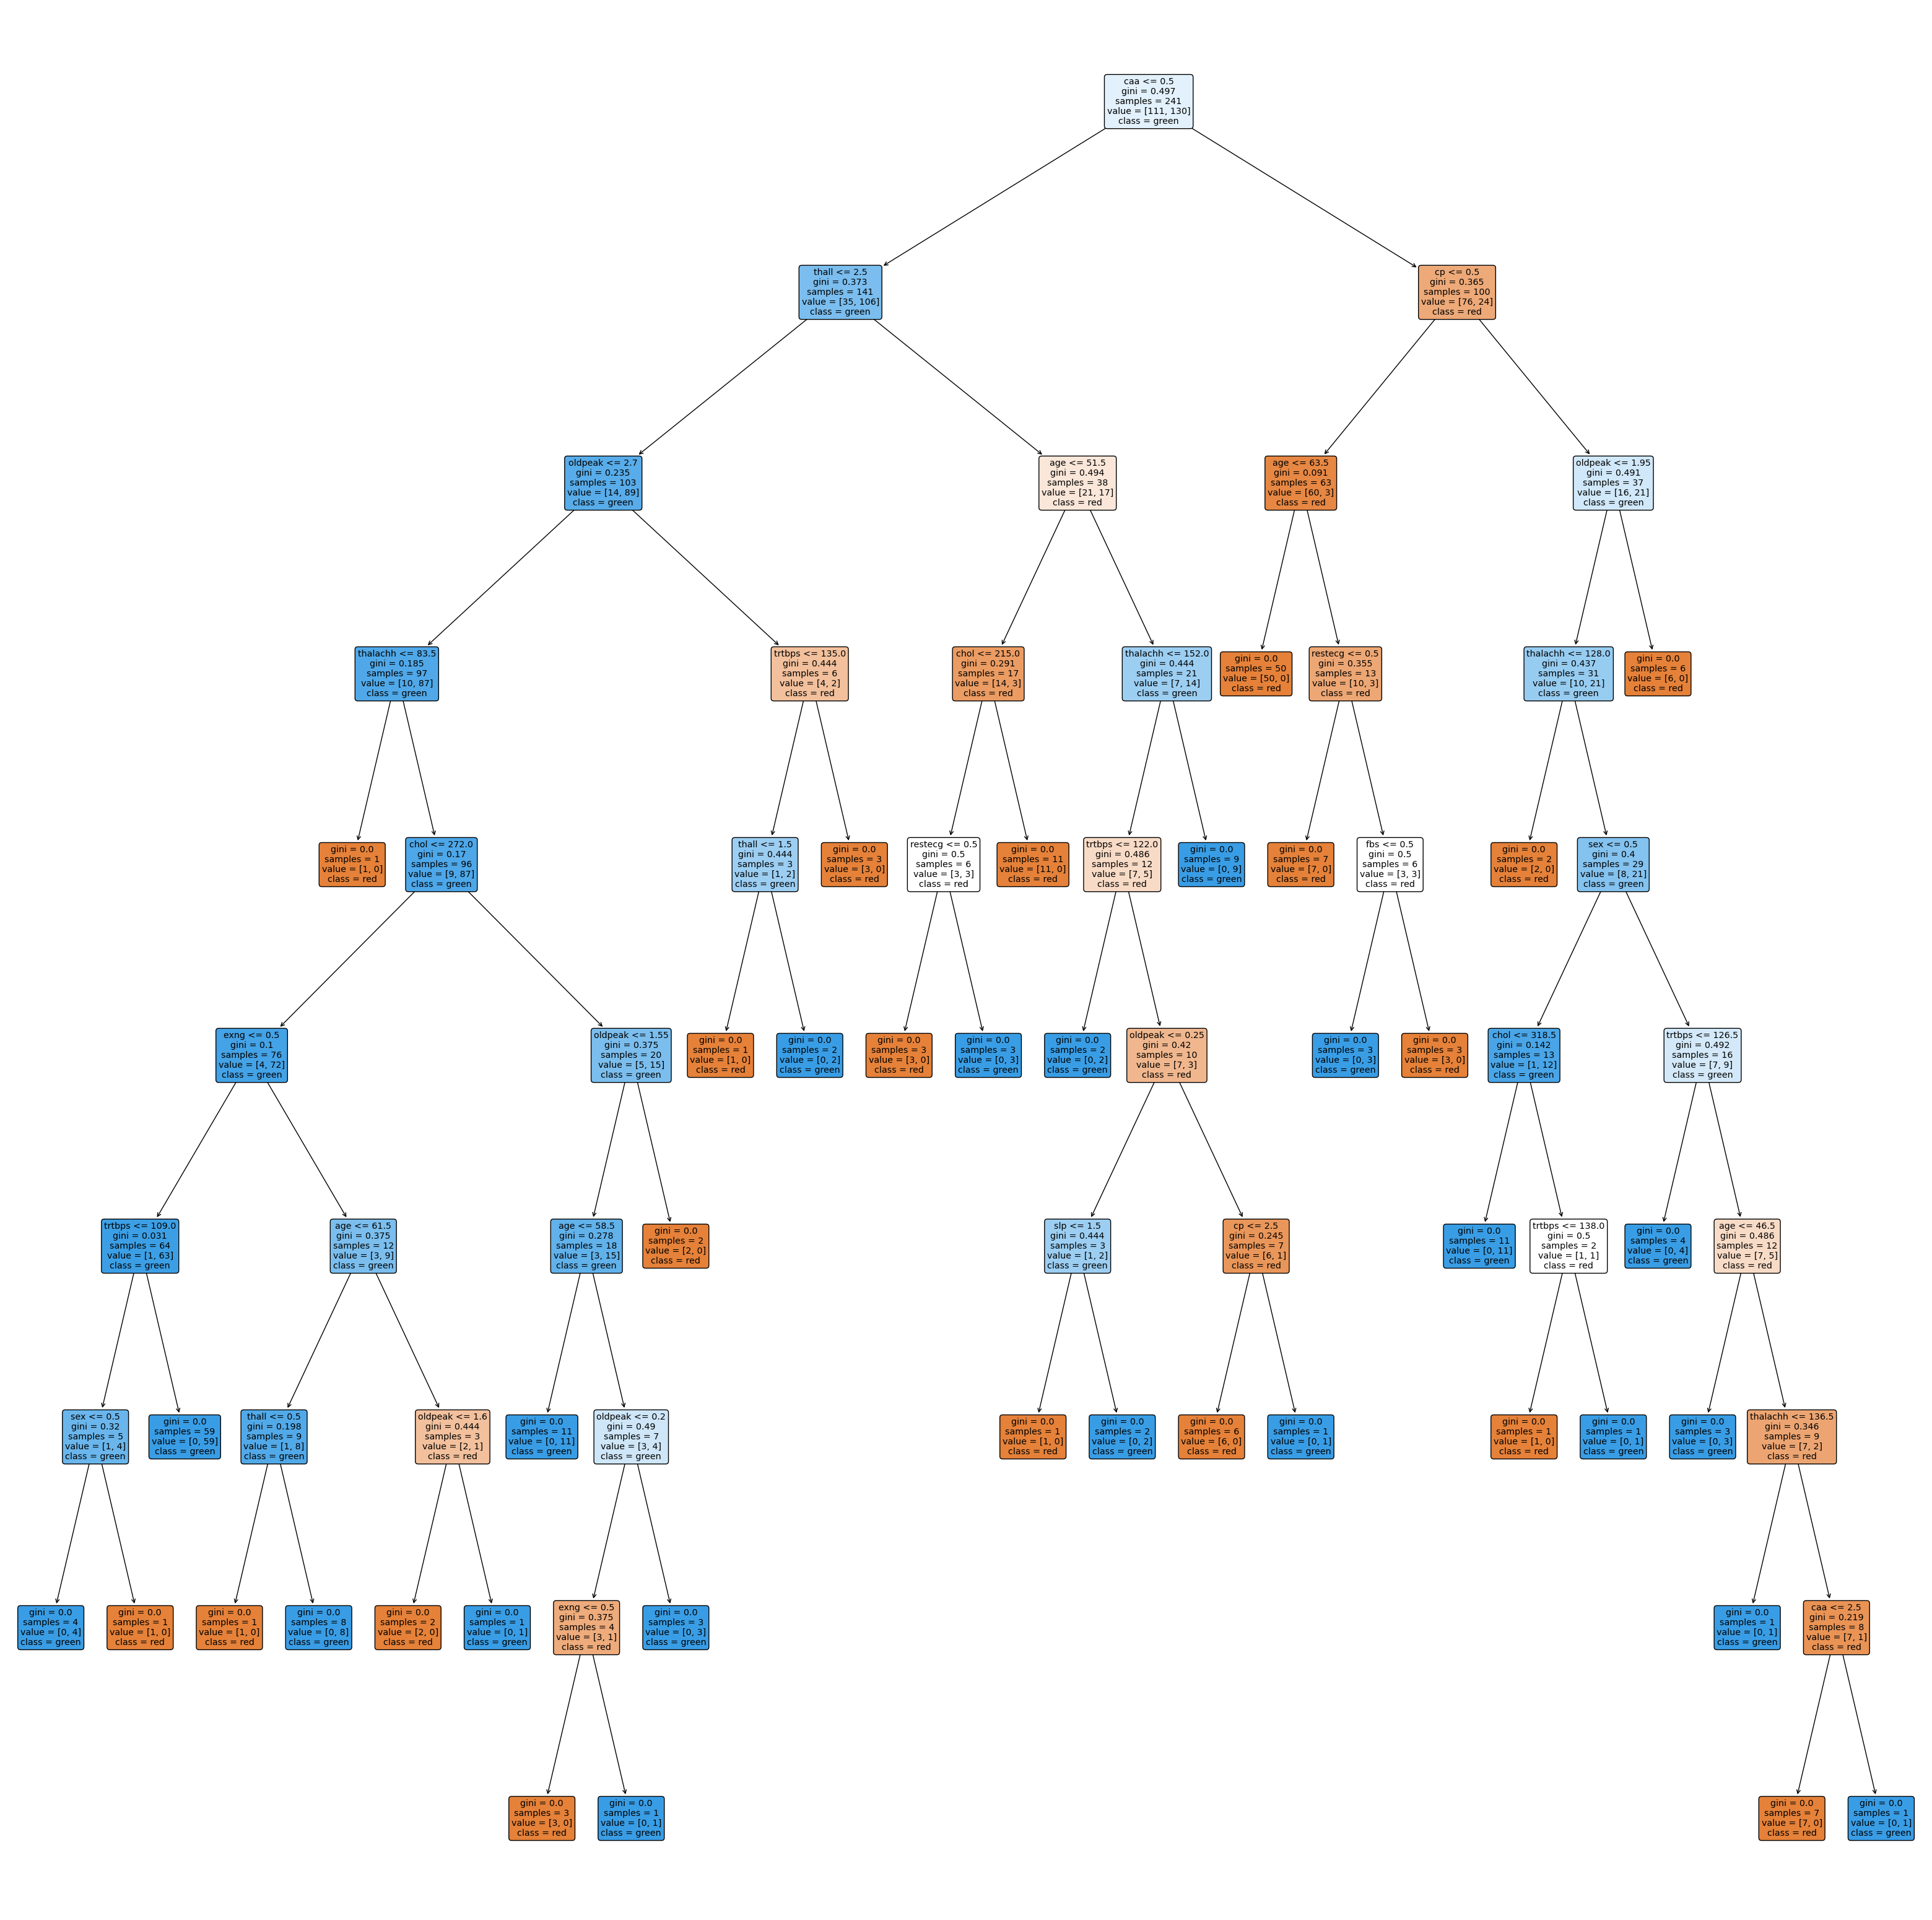

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Визуализация дерева
plt.figure(figsize=(40,40))
tree.plot_tree(model_2, feature_names=X_tr.columns, class_names=["red", "green"], filled=True, rounded=True)
plt.show()

In [ ]:
from sklearn.svm import SVC

model_3 = SVC(C = 1)
model_3.fit(x_train, y_train)


y_pred3 = model_3.predict(x_test)
accuracy_3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy_3}")


Accuracy: 0.7049180327868853


При построении модели логистической регресии точность модели составила 85%

дерева решений - 81%

Для улучшения точности неоьходимо изменить параметры моделей (возможно убрать некоторые признаки из выборки и тд)

